
# Introduction to AI in Chemistry


In [ ]:
pip install rdkit

In [ ]:
pip install mordred

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


## 1 Supervised Learning

### 1.1 Charger les données

In [ ]:
# URL brute du fichier CSV dans le repo GitHub
url = "https://raw.githubusercontent.com/Mathildec25/Introduction_AI_Chemistry/main/ROH_data.csv"

# Chargement dans un DataFrame
data = pd.read_csv(url)

# Afficher les premières lignes pour vérifier
data.head()


### 1.2 Séparer les données en Train/Test


In [ ]:
target = data['bp']
features = data[[ 'MW', 'carbons', 'aliphatic','cyclic']]

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(features, target,
                                                   test_size=0.2, random_state=18)


### 1.3 Entraîner un modèle de régression linéaire

Passons maintenant à un peu de *machine learning* en utilisant un modèle très simple : la **régression linéaire**.  
Ce modèle considère la valeur cible comme une **combinaison linéaire** (ou somme pondérée) des variables explicatives, où \(x\) représente les variables d’entrée (*features*) et \(w\) les poids associés.  


$$ cible = w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + ... $$


De manière générale, la procédure pour l’apprentissage supervisé — quel que soit le modèle — comporte trois étapes :

1. **Créer** un modèle et l’assigner à une variable.  
2. **Entraîner** le modèle avec les données d’apprentissage (*training data*).  
3. **Évaluer** le modèle avec les données de test (*testing data*) ou l’utiliser pour faire des prédictions.  

Pour mettre cela en œuvre, on utilise le module `linear_model` de scikit-learn.  
On crée d’abord le modèle avec la fonction `LinearRegression()`, que l’on stocke dans la variable `reg`. Ensuite, on l’entraîne avec la méthode `fit()` en lui fournissant les données d’apprentissage définies plus haut.

In [ ]:
# Création du modèle Random Forest
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

### 1.4 Evaluation

Plus la valeur de $r^2$ est proche de 1, meilleures sont les prédictions.


Une fois le modèle entraîné, il peut être utilisé pour faire des prédictions grâce à la méthode `predict()`.


In [ ]:
prediction = model.predict(X_test)
prediction

Rappelez-vous que l’algorithme n’a reçu que les variables explicatives du sous-ensemble de test ; il n’a jamais vu les valeurs cibles `y_test`. Les performances peuvent être évaluées en traçant les prédictions par rapport aux valeurs réelles.


In [ ]:
plt.plot(prediction, y_test, 'o')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K');

In [ ]:
r2 = r2_score(y_test, prediction)
print(f"R² : {r2:.3f}")

### 1.5 Utilisation de notre algorithme

In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors
import pandas as pd

# Initialiser Mordred
calc = Calculator(descriptors, ignore_3D=True)

def features_mordred(smiles: str) -> pd.DataFrame:
    mol = Chem.MolFromSmiles(smiles)
    df = calc.pandas([mol])

    # Sélection des colonnes utiles
    MW = float(df["MW"][0])
    carbons = int(df["nC"][0])
    cyclic = int(df["nRing"][0])
    arom_atoms = int(df["nAromAtom"][0]) if not pd.isna(df["nAromAtom"][0]) else 0

    # Aliphatic carbons
    aliphatic = carbons - arom_atoms

    # Construire DataFrame final
    features = pd.DataFrame([{
        "MW": MW,
        "carbons": carbons,
        "aliphatic": aliphatic,
        "cyclic": cyclic
    }])

    return features



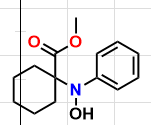

In [ ]:
# Exemple
smiles = "C1C(CCCC1)(N(O)C2=CC=CC=C2)C(=O)OC"
X_df = features_mordred(smiles)
print(X_df)

In [ ]:
# Prédiction
pred_bp = model.predict(X_df)[0]
print(f"Point d’ébullition prédit : {pred_bp:.2f} °K")

In [ ]:
# Conversion en °C
pred_bp_C = pred_bp - 273.15

print(f"Point d’ébullition prédit : {pred_bp_C:.2f} °C")